<center><img src="https://semcomp-epcc-unsa.github.io/assets/images/cslogos/logo-only.png" width="120">


$\tiny{Universidad \ Nacional \ de \ San \ Agustín \ de \ Arequipa \\
Escuela \ Profesional \ de \ Ciencia \ de \ la \ Computación  }$

---


#<center>$Laboratorio \ 06$

**Curso:** *Computacón Gráfica*

**Tema:** *DDA y Bresenham*

**Profesora:** *Paccotacya Yanque, Rosa Yuliana Gabriela*

**Alumno:** *Nifla Llallacachi, Manuel Angel* \\

---
#*Informe del Código: Dibujando una Casa y un Carro en C++ usando OpenGL y GLUT*

#Estructura del Código
El código está estructurado en un solo archivo C++ que contiene todas las funciones necesarias para dibujar una casa y un carro, además de varias funciones para dibujar líneas con las funciones de DDA y Bresenham.



1.   **Estructuras**:

*   Color: Representa el color con componentes rojo, verde y azul.
*   Punto: Representa un punto en 2D con coordenadas x e y.
*   Linea: Representa una línea entre dos puntos, con un color y un estilo de línea.

2.   **Clases Principales**:

*   Forma: Clase que maneja la adición y el dibujo de líneas. Incluye métodos para agregar líneas y para dibujarlas utilizando los algoritmos DDA y Bresenham.
*   Casa: Hereda de la clase *Forma* y define las líneas necesarias para dibujar una casa con sus partes.
*   Carro: Hereda de la clase *Forma* y define las líneas necesarias para dibujar un carro con un cuerpo formado por rectángulos, trapecios, y ruedas por hexágonos.
3.   **Métodos de Dibujo**



*   **Algoritmos de Dibujo de Líneas DDA (Digital Differential Analyzer)**Utilizado para dibujar líneas en diferentes estilos: sólido, punteado y rayado. Este algoritmo es simple y eficaz para líneas con cualquier pendiente.
*   **Bresenham**: Utilizado para dibujar líneas sólidas con eficiencia, especialmente para líneas con pendientes pequeñas.

4.   **Estilos de Línea**

*   *Línea Punteada*: Esta función dibuja una línea punteada.
*   *Línea Discontinua*: De manera similar, esta función dibuja una línea discontinua con un patrón definido.
*   *Línea Sólida*: Esta función dibuja una línea sólida sin ningún patrón especial.

5.  **Conclusión**: Este laboratorio demuestra cómo utilizar C++ y OpenGL con GLUT para dibujar figuras geométricas básicas y líneas con diferentes estilos en una ventana gráfica. Visual Studio Code se utilizó como editor de código y entorno de desarrollo, y GLUT proporcionó las herramientas necesarias para manejar la ventana y los eventos de entrada. Las funciones definidas permiten dibujar una casa y un carro con diferentes partes coloreadas, así como líneas utilizando algoritmos DDA y Bresenham y diferentes estilos de línea.



---


#*Requerimientos*



*   **Visual Studio** es un editor de código fuente desarrollado por Microsoft. Es una herramienta poderosa y flexible que soporta una amplia gama de lenguajes de programación, incluyendo C++. En este laboratorio, se usó Visual Studio para escribir, compilar y depurar el código C++.
*   **GLUT** (OpenGL Utility Toolkit) es una biblioteca que facilita la creación de aplicaciones OpenGL. Proporciona una API simple para crear ventanas, manejar eventos de entrada y otras tareas comunes en aplicaciones gráficas. En este laboratorio, GLUT es utilizado para manejar la ventana de renderizado y la interacción básica con el usuario.





---
#*CODIGO C++ DE LAS FUNCIONES*

In [ ]:
%%writefile main.cpp

#include <GL/glut.h>
#include <vector>
#include <cmath>
#include <iostream>

struct Color {
    float r, g, b;
};

struct Punto {
    int x, y;
};

struct Linea {
    Punto inicio, fin;
    Color color;
    std::string estilo; // "sólido", "punteado", "rayado"
};

class Forma {
public:
    std::vector<Linea> lineas;
    void agregarLinea(Punto inicio, Punto fin, Color color, std::string estilo) {
        lineas.push_back({ inicio, fin, color, estilo });
    }
    void dibujar() {
        for (auto& linea : lineas) {
            glColor3f(linea.color.r, linea.color.g, linea.color.b);
            if (linea.estilo == "sólido") {
                dibujarLineaBresenham(linea.inicio, linea.fin);
            }
            else if (linea.estilo == "punteado") {
                dibujarLineaDDA(linea.inicio, linea.fin, "punteado");
            }
            else if (linea.estilo == "rayado") {
                dibujarLineaDDA(linea.inicio, linea.fin, "rayado");
            }
        }
    }

private:
    void dibujarLineaDDA(Punto inicio, Punto fin, std::string estilo) {
        int dx = fin.x - inicio.x;
        int dy = fin.y - inicio.y;
        int pasos = std::max(std::abs(dx), std::abs(dy));
        float incrementoX = dx / (float)pasos;
        float incrementoY = dy / (float)pasos;
        float x = inicio.x;
        float y = inicio.y;
        int cuenta = 0;
        for (int i = 0; i <= pasos; ++i) {
            if (estilo == "punteado" && cuenta % 3 != 0) {
                cuenta++;
                x += incrementoX;
                y += incrementoY;
                continue;
            }
            else if (estilo == "rayado" && (cuenta / 10) % 2 != 0) {
                cuenta++;
                x += incrementoX;
                y += incrementoY;
                continue;
            }
            glBegin(GL_POINTS);
            glVertex2i(round(x), round(y));
            glEnd();
            x += incrementoX;
            y += incrementoY;
            cuenta++;
        }
    }

    void dibujarLineaBresenham(Punto inicio, Punto fin) {
        int x0 = inicio.x;
        int y0 = inicio.y;
        int x1 = fin.x;
        int y1 = fin.y;
        int dx = std::abs(x1 - x0);
        int dy = std::abs(y1 - y0);
        int sx = (x0 < x1) ? 1 : -1;
        int sy = (y0 < y1) ? 1 : -1;
        int err = dx - dy;
        while (true) {
            glBegin(GL_POINTS);
            glVertex2i(x0, y0);
            glEnd();
            if (x0 == x1 && y0 == y1) break;
            int e2 = 2 * err;
            if (e2 > -dy) {
                err -= dy;
                x0 += sx;
            }
            if (e2 < dx) {
                err += dx;
                y0 += sy;
            }
        }
    }
};

class Casa : public Forma {
public:
    Casa() {
        // Fachada
        agregarLinea({ 100, 100 }, { 200, 100 }, { 1.0f, 0.0f, 0.0f }, "sólido");
        agregarLinea({ 200, 100 }, { 200, 200 }, { 0.0f, 1.0f, 0.0f }, "sólido");
        agregarLinea({ 200, 200 }, { 100, 200 }, { 0.0f, 0.0f, 1.0f }, "sólido");
        agregarLinea({ 100, 200 }, { 100, 100 }, { 1.0f, 1.0f, 0.0f }, "sólido");
        agregarLinea({ 100, 200 }, { 150, 250 }, { 1.0f, 0.0f, 1.0f }, "sólido");
        agregarLinea({ 150, 250 }, { 200, 200 }, { 0.0f, 1.0f, 1.0f }, "sólido");

        // Puerta
        agregarLinea({ 130, 100 }, { 130, 150 }, { 0.5f, 0.25f, 0.0f }, "sólido");
        agregarLinea({ 130, 150 }, { 170, 150 }, { 0.5f, 0.25f, 0.0f }, "sólido");
        agregarLinea({ 170, 150 }, { 170, 100 }, { 0.5f, 0.25f, 0.0f }, "sólido");

        // Ventana1
        agregarLinea({ 110, 160 }, { 110, 180 }, { 0.0f, 0.5f, 0.5f }, "sólido");
        agregarLinea({ 110, 180 }, { 130, 180 }, { 0.0f, 0.5f, 0.5f }, "sólido");
        agregarLinea({ 130, 180 }, { 130, 160 }, { 0.0f, 0.5f, 0.5f }, "sólido");
        agregarLinea({ 130, 160 }, { 110, 160 }, { 0.0f, 0.5f, 0.5f }, "sólido");

        // Ventana2
        agregarLinea({ 170, 160 }, { 170, 180 }, { 0.0f, 0.5f, 0.5f }, "punteado");
        agregarLinea({ 170, 180 }, { 190, 180 }, { 0.0f, 0.5f, 0.5f }, "punteado");
        agregarLinea({ 190, 180 }, { 190, 160 }, { 0.0f, 0.5f, 0.5f }, "punteado");
        agregarLinea({ 190, 160 }, { 170, 160 }, { 0.0f, 0.5f, 0.5f }, "punteado");
    }
};

class Carro : public Forma {
public:
    Carro() {
        // Cuerpo
        agregarLinea({ 300, 115 }, { 400, 115 }, { 0.5f, 0.25f, 0.0f }, "punteado");
        agregarLinea({ 400, 115 }, { 400, 145 }, { 0.5f, 0.25f, 0.0f }, "punteado");
        agregarLinea({ 400, 145 }, { 300, 145 }, { 0.5f, 0.25f, 0.0f }, "punteado");
        agregarLinea({ 300, 145 }, { 300, 115 }, { 0.5f, 0.25f, 0.0f }, "punteado");

        agregarLinea({ 315, 145 }, { 325, 170 }, { 1.0f, 0.5f, 0.0f }, "sólido");
        agregarLinea({ 325, 170 }, { 380, 170 }, { 1.0f, 0.5f, 0.0f }, "sólido");
        agregarLinea({ 380, 170 }, { 390, 145 }, { 1.0f, 0.5f, 0.0f }, "sólido");

        // Ventanas1
        agregarLinea({ 322, 145 }, { 330, 165 }, { 0.0f, 0.5f, 0.5f }, "sólido");
        agregarLinea({ 330, 165 }, { 348, 165 }, { 0.0f, 0.5f, 0.5f }, "sólido");
        agregarLinea({ 348, 165 }, { 348, 145 }, { 0.0f, 0.5f, 0.5f }, "sólido");

        // Ventanas2
        agregarLinea({ 352, 145 }, { 352, 165 }, { 0.0f, 0.5f, 0.5f }, "sólido");
        agregarLinea({ 352, 165 }, { 375, 165 }, { 0.0f, 0.5f, 0.5f }, "sólido");
        agregarLinea({ 375, 165 }, { 382, 145 }, { 0.0f, 0.5f, 0.5f }, "sólido");

        // Agregar ruedas como círculos
        //dibujarCirculo({ 320, 90 }, 10, { 0.0f, 0.0f, 0.0f });
        //dibujarCirculo({ 380, 90 }, 10, { 0.0f, 0.0f, 0.0f });

        // Rueda
        dibujarRueda({ 325, 115 }, 15, { 0.0f, 0.0f, 0.0f });
        dibujarRueda({ 375, 115 }, 15, { 0.0f, 0.0f, 0.0f });
    }

private:
    /*void dibujarCirculo(Punto centro, int radio, Color color) {
        glColor3f(color.r, color.g, color.b);
        int num_segmentos = 100;
        glBegin(GL_TRIANGLE_FAN);
        glVertex2i(centro.x, centro.y); // Centro del círculo
        for (int i = 0; i <= num_segmentos; i++) {
            float theta = 2.0f * 3.1415926f * float(i) / float(num_segmentos);
            float dx = radio * cosf(theta);
            float dy = radio * sinf(theta);
            glVertex2i(centro.x + dx, centro.y + dy);
        }
        glEnd();
    }*/
    void dibujarRueda(Punto centro, int radio, Color color) {
        int num_segmentos = 6; // Hexágono tiene 6 lados
        float angulo = 2.0f * 3.1415926f / num_segmentos;
        for (int i = 0; i < num_segmentos; ++i) {
            float theta1 = angulo * i;
            float theta2 = angulo * (i + 1);
            Punto p1 = { centro.x + radio * cosf(theta1), centro.y + radio * sinf(theta1) };
            Punto p2 = { centro.x + radio * cosf(theta2), centro.y + radio * sinf(theta2) };
            agregarLinea(p1, p2, color, "sólido");
        }
    }
};

Casa casa;
Carro carro;

void mostrar() {
    glClear(GL_COLOR_BUFFER_BIT);

    casa.dibujar();
    carro.dibujar();

    glFlush();
}

void inicializar() {
    glClearColor(1.0, 1.0, 1.0, 1.0);
    glColor3f(0.0, 0.0, 0.0);
    gluOrtho2D(0, 500, 0, 500);
}

int main(int argc, char** argv) {
    glutInit(&argc, argv);
    glutInitDisplayMode(GLUT_SINGLE | GLUT_RGB);
    glutInitWindowSize(500, 500);
    glutInitWindowPosition(100, 100);
    glutCreateWindow("Casa y Carro");
    inicializar();
    glutDisplayFunc(mostrar);
    glutMainLoop();
    return 0;
}

Writing main.cpp


#*IMAGEN DE SALIDA*

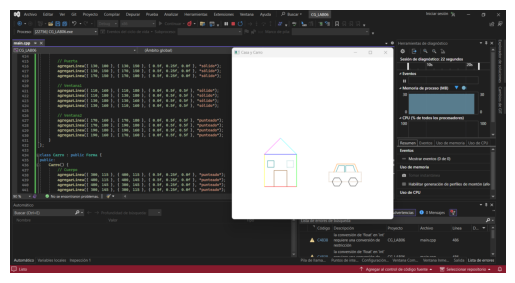

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

# Suponiendo que el nombre del archivo cargado es 'imagen.jpg'
img = Image.open('1.png')
plt.imshow(img)
plt.axis('off')  # Para ocultar los ejes
plt.show()




---


#**Implementación de la Función de Traslación**

Para trasladar la figura, tanto la casa como el carro a otra posición, se tendría que implementar una función de traslación en la clase Forma que ajuste las coordenadas de todas las líneas de la figura. Esto permitirá mover la figura a una nueva ubicación sin necesidad de redibujarla manualmente desde cero.

In [ ]:
%%writefile main_traslate.cpp

#include <GL/glut.h>
#include <vector>
#include <cmath>
#include <iostream>

struct Color {
    float r, g, b;
};

struct Punto {
    int x, y;
};

struct Linea {
    Punto inicio, fin;
    Color color;
    std::string estilo; // "sólido", "punteado", "rayado"
};

class Forma {
public:
    std::vector<Linea> lineas;
    void agregarLinea(Punto inicio, Punto fin, Color color, std::string estilo) {
        lineas.push_back({ inicio, fin, color, estilo });
    }
    void dibujar() {
        for (auto& linea : lineas) {
            glColor3f(linea.color.r, linea.color.g, linea.color.b);
            if (linea.estilo == "sólido") {
                dibujarLineaBresenham(linea.inicio, linea.fin);
            }
            else if (linea.estilo == "punteado") {
                dibujarLineaDDA(linea.inicio, linea.fin, "punteado");
            }
            else if (linea.estilo == "rayado") {
                dibujarLineaDDA(linea.inicio, linea.fin, "rayado");
            }
        }
    }
    ///////////////////////////////////
    void trasladar(int dx, int dy) {
        for (auto& linea : lineas) {
            linea.inicio.x += dx;
            linea.inicio.y += dy;
            linea.fin.x += dx;
            linea.fin.y += dy;
        }
    }
    //////////////////////////////////

private:
    void dibujarLineaDDA(Punto inicio, Punto fin, std::string estilo) {
        int dx = fin.x - inicio.x;
        int dy = fin.y - inicio.y;
        int pasos = std::max(std::abs(dx), std::abs(dy));
        float incrementoX = dx / (float)pasos;
        float incrementoY = dy / (float)pasos;
        float x = inicio.x;
        float y = inicio.y;
        int cuenta = 0;
        for (int i = 0; i <= pasos; ++i) {
            if (estilo == "punteado" && cuenta % 3 != 0) {
                cuenta++;
                x += incrementoX;
                y += incrementoY;
                continue;
            }
            else if (estilo == "rayado" && (cuenta / 10) % 2 != 0) {
                cuenta++;
                x += incrementoX;
                y += incrementoY;
                continue;
            }
            glBegin(GL_POINTS);
            glVertex2i(round(x), round(y));
            glEnd();
            x += incrementoX;
            y += incrementoY;
            cuenta++;
        }
    }

    void dibujarLineaBresenham(Punto inicio, Punto fin) {
        int x0 = inicio.x;
        int y0 = inicio.y;
        int x1 = fin.x;
        int y1 = fin.y;
        int dx = std::abs(x1 - x0);
        int dy = std::abs(y1 - y0);
        int sx = (x0 < x1) ? 1 : -1;
        int sy = (y0 < y1) ? 1 : -1;
        int err = dx - dy;
        while (true) {
            glBegin(GL_POINTS);
            glVertex2i(x0, y0);
            glEnd();
            if (x0 == x1 && y0 == y1) break;
            int e2 = 2 * err;
            if (e2 > -dy) {
                err -= dy;
                x0 += sx;
            }
            if (e2 < dx) {
                err += dx;
                y0 += sy;
            }
        }
    }
};

class Casa : public Forma {
public:
    Casa() {
        // Fachada
        agregarLinea({ 100, 100 }, { 200, 100 }, { 1.0f, 0.0f, 0.0f }, "sólido");
        agregarLinea({ 200, 100 }, { 200, 200 }, { 0.0f, 1.0f, 0.0f }, "sólido");
        agregarLinea({ 200, 200 }, { 100, 200 }, { 0.0f, 0.0f, 1.0f }, "sólido");
        agregarLinea({ 100, 200 }, { 100, 100 }, { 1.0f, 1.0f, 0.0f }, "sólido");
        agregarLinea({ 100, 200 }, { 150, 250 }, { 1.0f, 0.0f, 1.0f }, "sólido");
        agregarLinea({ 150, 250 }, { 200, 200 }, { 0.0f, 1.0f, 1.0f }, "sólido");

        // Puerta
        agregarLinea({ 130, 100 }, { 130, 150 }, { 0.5f, 0.25f, 0.0f }, "sólido");
        agregarLinea({ 130, 150 }, { 170, 150 }, { 0.5f, 0.25f, 0.0f }, "sólido");
        agregarLinea({ 170, 150 }, { 170, 100 }, { 0.5f, 0.25f, 0.0f }, "sólido");

        // Ventana1
        agregarLinea({ 110, 160 }, { 110, 180 }, { 0.0f, 0.5f, 0.5f }, "sólido");
        agregarLinea({ 110, 180 }, { 130, 180 }, { 0.0f, 0.5f, 0.5f }, "sólido");
        agregarLinea({ 130, 180 }, { 130, 160 }, { 0.0f, 0.5f, 0.5f }, "sólido");
        agregarLinea({ 130, 160 }, { 110, 160 }, { 0.0f, 0.5f, 0.5f }, "sólido");

        // Ventana2
        agregarLinea({ 170, 160 }, { 170, 180 }, { 0.0f, 0.5f, 0.5f }, "punteado");
        agregarLinea({ 170, 180 }, { 190, 180 }, { 0.0f, 0.5f, 0.5f }, "punteado");
        agregarLinea({ 190, 180 }, { 190, 160 }, { 0.0f, 0.5f, 0.5f }, "punteado");
        agregarLinea({ 190, 160 }, { 170, 160 }, { 0.0f, 0.5f, 0.5f }, "punteado");
    }
};

class Carro : public Forma {
public:
    Carro() {
        // Cuerpo
        agregarLinea({ 300, 115 }, { 400, 115 }, { 0.5f, 0.25f, 0.0f }, "punteado");
        agregarLinea({ 400, 115 }, { 400, 145 }, { 0.5f, 0.25f, 0.0f }, "punteado");
        agregarLinea({ 400, 145 }, { 300, 145 }, { 0.5f, 0.25f, 0.0f }, "punteado");
        agregarLinea({ 300, 145 }, { 300, 115 }, { 0.5f, 0.25f, 0.0f }, "punteado");

        agregarLinea({ 315, 145 }, { 325, 170 }, { 1.0f, 0.5f, 0.0f }, "sólido");
        agregarLinea({ 325, 170 }, { 380, 170 }, { 1.0f, 0.5f, 0.0f }, "sólido");
        agregarLinea({ 380, 170 }, { 390, 145 }, { 1.0f, 0.5f, 0.0f }, "sólido");

        // Ventanas1
        agregarLinea({ 322, 145 }, { 330, 165 }, { 0.0f, 0.5f, 0.5f }, "sólido");
        agregarLinea({ 330, 165 }, { 348, 165 }, { 0.0f, 0.5f, 0.5f }, "sólido");
        agregarLinea({ 348, 165 }, { 348, 145 }, { 0.0f, 0.5f, 0.5f }, "sólido");

        // Ventanas2
        agregarLinea({ 352, 145 }, { 352, 165 }, { 0.0f, 0.5f, 0.5f }, "sólido");
        agregarLinea({ 352, 165 }, { 375, 165 }, { 0.0f, 0.5f, 0.5f }, "sólido");
        agregarLinea({ 375, 165 }, { 382, 145 }, { 0.0f, 0.5f, 0.5f }, "sólido");

        // Agregar ruedas como círculos
        //dibujarCirculo({ 320, 90 }, 10, { 0.0f, 0.0f, 0.0f });
        //dibujarCirculo({ 380, 90 }, 10, { 0.0f, 0.0f, 0.0f });

        // Rueda
        dibujarRueda({ 325, 115 }, 15, { 0.0f, 0.0f, 0.0f });
        dibujarRueda({ 375, 115 }, 15, { 0.0f, 0.0f, 0.0f });
    }

private:
    /*void dibujarCirculo(Punto centro, int radio, Color color) {
        glColor3f(color.r, color.g, color.b);
        int num_segmentos = 100;
        glBegin(GL_TRIANGLE_FAN);
        glVertex2i(centro.x, centro.y); // Centro del círculo
        for (int i = 0; i <= num_segmentos; i++) {
            float theta = 2.0f * 3.1415926f * float(i) / float(num_segmentos);
            float dx = radio * cosf(theta);
            float dy = radio * sinf(theta);
            glVertex2i(centro.x + dx, centro.y + dy);
        }
        glEnd();
    }*/
    void dibujarRueda(Punto centro, int radio, Color color) {
        int num_segmentos = 6; // Hexágono tiene 6 lados
        float angulo = 2.0f * 3.1415926f / num_segmentos;
        for (int i = 0; i < num_segmentos; ++i) {
            float theta1 = angulo * i;
            float theta2 = angulo * (i + 1);
            Punto p1 = { centro.x + radio * cosf(theta1), centro.y + radio * sinf(theta1) };
            Punto p2 = { centro.x + radio * cosf(theta2), centro.y + radio * sinf(theta2) };
            agregarLinea(p1, p2, color, "sólido");
        }
    }
};

Casa casa;
Carro carro;

void mostrar() {
    glClear(GL_COLOR_BUFFER_BIT);

    casa.dibujar();
    carro.dibujar();

    glFlush();
}

void inicializar() {
    glClearColor(1.0, 1.0, 1.0, 1.0);
    glColor3f(0.0, 0.0, 0.0);
    gluOrtho2D(0, 500, 0, 500);
}

int main(int argc, char** argv) {
    glutInit(&argc, argv);
    glutInitDisplayMode(GLUT_SINGLE | GLUT_RGB);
    glutInitWindowSize(500, 500);
    glutInitWindowPosition(100, 100);
    glutCreateWindow("Casa y Carro");
    inicializar();

    // Trasladar la casa y el carro
    casa.trasladar(50, 50);  // Mover la casa a la nueva posición
    carro.trasladar(-50, -50); // Mover el carro a la nueva posición

    glutDisplayFunc(mostrar);
    glutMainLoop();
    return 0;
}


Writing main_traslate.cpp


#*IMAGEN DE SALIDA*

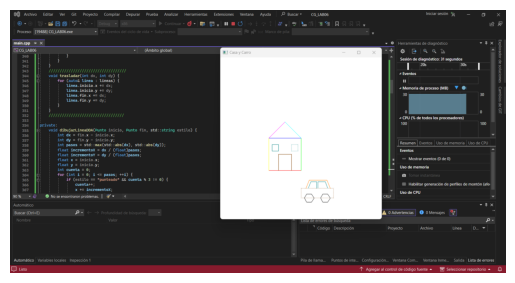

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

# Suponiendo que el nombre del archivo cargado es 'imagen.jpg'
img = Image.open('2.png')
plt.imshow(img)
plt.axis('off')  # Para ocultar los ejes
plt.show()




---
#**Implementación de la Función de Escalado**

Para escalar la figura casa y hacerla más grande o más pequeña, se tendría que implementar una función de escalado en la clase Forma que ajuste las coordenadas de las líneas de la figura en función del escalar.


In [ ]:
%%writefile main_traslate_scalar.cpp



#include <GL/glut.h>
#include <vector>
#include <cmath>
#include <iostream>

struct Color {
    float r, g, b;
};

struct Punto {
    int x, y;
};

struct Linea {
    Punto inicio, fin;
    Color color;
    std::string estilo; // "sólido", "punteado", "rayado"
};

class Forma {
public:
    std::vector<Linea> lineas;
    void agregarLinea(Punto inicio, Punto fin, Color color, std::string estilo) {
        lineas.push_back({ inicio, fin, color, estilo });
    }
    void dibujar() {
        for (auto& linea : lineas) {
            glColor3f(linea.color.r, linea.color.g, linea.color.b);
            if (linea.estilo == "sólido") {
                dibujarLineaBresenham(linea.inicio, linea.fin);
            }
            else if (linea.estilo == "punteado") {
                dibujarLineaDDA(linea.inicio, linea.fin, "punteado");
            }
            else if (linea.estilo == "rayado") {
                dibujarLineaDDA(linea.inicio, linea.fin, "rayado");
            }
        }
    }
    ///////////////////////////////////
    void trasladar(int dx, int dy) {
        for (auto& linea : lineas) {
            linea.inicio.x += dx;
            linea.inicio.y += dy;
            linea.fin.x += dx;
            linea.fin.y += dy;
        }
    }
    //////////////////////////////////

    void escalar(float factor, Punto origen) {
        for (auto& linea : lineas) {
            linea.inicio.x = origen.x + factor * (linea.inicio.x - origen.x);
            linea.inicio.y = origen.y + factor * (linea.inicio.y - origen.y);
            linea.fin.x = origen.x + factor * (linea.fin.x - origen.x);
            linea.fin.y = origen.y + factor * (linea.fin.y - origen.y);
        }
    }

private:
    void dibujarLineaDDA(Punto inicio, Punto fin, std::string estilo) {
        int dx = fin.x - inicio.x;
        int dy = fin.y - inicio.y;
        int pasos = std::max(std::abs(dx), std::abs(dy));
        float incrementoX = dx / (float)pasos;
        float incrementoY = dy / (float)pasos;
        float x = inicio.x;
        float y = inicio.y;
        int cuenta = 0;
        for (int i = 0; i <= pasos; ++i) {
            if (estilo == "punteado" && cuenta % 3 != 0) {
                cuenta++;
                x += incrementoX;
                y += incrementoY;
                continue;
            }
            else if (estilo == "rayado" && (cuenta / 10) % 2 != 0) {
                cuenta++;
                x += incrementoX;
                y += incrementoY;
                continue;
            }
            glBegin(GL_POINTS);
            glVertex2i(round(x), round(y));
            glEnd();
            x += incrementoX;
            y += incrementoY;
            cuenta++;
        }
    }

    void dibujarLineaBresenham(Punto inicio, Punto fin) {
        int x0 = inicio.x;
        int y0 = inicio.y;
        int x1 = fin.x;
        int y1 = fin.y;
        int dx = std::abs(x1 - x0);
        int dy = std::abs(y1 - y0);
        int sx = (x0 < x1) ? 1 : -1;
        int sy = (y0 < y1) ? 1 : -1;
        int err = dx - dy;
        while (true) {
            glBegin(GL_POINTS);
            glVertex2i(x0, y0);
            glEnd();
            if (x0 == x1 && y0 == y1) break;
            int e2 = 2 * err;
            if (e2 > -dy) {
                err -= dy;
                x0 += sx;
            }
            if (e2 < dx) {
                err += dx;
                y0 += sy;
            }
        }
    }
};

class Casa : public Forma {
public:
    Casa() {
        // Fachada
        agregarLinea({ 100, 100 }, { 200, 100 }, { 1.0f, 0.0f, 0.0f }, "sólido");
        agregarLinea({ 200, 100 }, { 200, 200 }, { 0.0f, 1.0f, 0.0f }, "sólido");
        agregarLinea({ 200, 200 }, { 100, 200 }, { 0.0f, 0.0f, 1.0f }, "sólido");
        agregarLinea({ 100, 200 }, { 100, 100 }, { 1.0f, 1.0f, 0.0f }, "sólido");
        agregarLinea({ 100, 200 }, { 150, 250 }, { 1.0f, 0.0f, 1.0f }, "sólido");
        agregarLinea({ 150, 250 }, { 200, 200 }, { 0.0f, 1.0f, 1.0f }, "sólido");

        // Puerta
        agregarLinea({ 130, 100 }, { 130, 150 }, { 0.5f, 0.25f, 0.0f }, "sólido");
        agregarLinea({ 130, 150 }, { 170, 150 }, { 0.5f, 0.25f, 0.0f }, "sólido");
        agregarLinea({ 170, 150 }, { 170, 100 }, { 0.5f, 0.25f, 0.0f }, "sólido");

        // Ventana1
        agregarLinea({ 110, 160 }, { 110, 180 }, { 0.0f, 0.5f, 0.5f }, "sólido");
        agregarLinea({ 110, 180 }, { 130, 180 }, { 0.0f, 0.5f, 0.5f }, "sólido");
        agregarLinea({ 130, 180 }, { 130, 160 }, { 0.0f, 0.5f, 0.5f }, "sólido");
        agregarLinea({ 130, 160 }, { 110, 160 }, { 0.0f, 0.5f, 0.5f }, "sólido");

        // Ventana2
        agregarLinea({ 170, 160 }, { 170, 180 }, { 0.0f, 0.5f, 0.5f }, "punteado");
        agregarLinea({ 170, 180 }, { 190, 180 }, { 0.0f, 0.5f, 0.5f }, "punteado");
        agregarLinea({ 190, 180 }, { 190, 160 }, { 0.0f, 0.5f, 0.5f }, "punteado");
        agregarLinea({ 190, 160 }, { 170, 160 }, { 0.0f, 0.5f, 0.5f }, "punteado");
    }
};

class Carro : public Forma {
public:
    Carro() {
        // Cuerpo
        agregarLinea({ 300, 115 }, { 400, 115 }, { 0.5f, 0.25f, 0.0f }, "punteado");
        agregarLinea({ 400, 115 }, { 400, 145 }, { 0.5f, 0.25f, 0.0f }, "punteado");
        agregarLinea({ 400, 145 }, { 300, 145 }, { 0.5f, 0.25f, 0.0f }, "punteado");
        agregarLinea({ 300, 145 }, { 300, 115 }, { 0.5f, 0.25f, 0.0f }, "punteado");

        agregarLinea({ 315, 145 }, { 325, 170 }, { 1.0f, 0.5f, 0.0f }, "sólido");
        agregarLinea({ 325, 170 }, { 380, 170 }, { 1.0f, 0.5f, 0.0f }, "sólido");
        agregarLinea({ 380, 170 }, { 390, 145 }, { 1.0f, 0.5f, 0.0f }, "sólido");

        // Ventanas1
        agregarLinea({ 322, 145 }, { 330, 165 }, { 0.0f, 0.5f, 0.5f }, "sólido");
        agregarLinea({ 330, 165 }, { 348, 165 }, { 0.0f, 0.5f, 0.5f }, "sólido");
        agregarLinea({ 348, 165 }, { 348, 145 }, { 0.0f, 0.5f, 0.5f }, "sólido");

        // Ventanas2
        agregarLinea({ 352, 145 }, { 352, 165 }, { 0.0f, 0.5f, 0.5f }, "sólido");
        agregarLinea({ 352, 165 }, { 375, 165 }, { 0.0f, 0.5f, 0.5f }, "sólido");
        agregarLinea({ 375, 165 }, { 382, 145 }, { 0.0f, 0.5f, 0.5f }, "sólido");

        // Agregar ruedas como círculos
        //dibujarCirculo({ 320, 90 }, 10, { 0.0f, 0.0f, 0.0f });
        //dibujarCirculo({ 380, 90 }, 10, { 0.0f, 0.0f, 0.0f });

        // Rueda
        dibujarRueda({ 325, 115 }, 15, { 0.0f, 0.0f, 0.0f });
        dibujarRueda({ 375, 115 }, 15, { 0.0f, 0.0f, 0.0f });
    }

private:
    /*void dibujarCirculo(Punto centro, int radio, Color color) {
        glColor3f(color.r, color.g, color.b);
        int num_segmentos = 100;
        glBegin(GL_TRIANGLE_FAN);
        glVertex2i(centro.x, centro.y); // Centro del círculo
        for (int i = 0; i <= num_segmentos; i++) {
            float theta = 2.0f * 3.1415926f * float(i) / float(num_segmentos);
            float dx = radio * cosf(theta);
            float dy = radio * sinf(theta);
            glVertex2i(centro.x + dx, centro.y + dy);
        }
        glEnd();
    }*/
    void dibujarRueda(Punto centro, int radio, Color color) {
        int num_segmentos = 6; // Hexágono tiene 6 lados
        float angulo = 2.0f * 3.1415926f / num_segmentos;
        for (int i = 0; i < num_segmentos; ++i) {
            float theta1 = angulo * i;
            float theta2 = angulo * (i + 1);
            Punto p1 = { centro.x + radio * cosf(theta1), centro.y + radio * sinf(theta1) };
            Punto p2 = { centro.x + radio * cosf(theta2), centro.y + radio * sinf(theta2) };
            agregarLinea(p1, p2, color, "sólido");
        }
    }
};

Casa casa;
Carro carro;

void mostrar() {
    glClear(GL_COLOR_BUFFER_BIT);

    casa.dibujar();
    carro.dibujar();

    glFlush();
}

void inicializar() {
    glClearColor(1.0, 1.0, 1.0, 1.0);
    glColor3f(0.0, 0.0, 0.0);
    gluOrtho2D(0, 500, 0, 500);
}

int main(int argc, char** argv) {
    glutInit(&argc, argv);
    glutInitDisplayMode(GLUT_SINGLE | GLUT_RGB);
    glutInitWindowSize(500, 500);
    glutInitWindowPosition(100, 100);
    glutCreateWindow("Casa y Carro");
    inicializar();

    casa.trasladar(50, 50);  // Mover la casa a la nueva posición
    carro.trasladar(-50, -50); // Mover el carro a la nueva posición

    // Escalar la casa
    Punto origenCasa = { 150, 150 }; // Origen para el escalado
    casa.escalar(1.5, origenCasa);  // Aumentar tamaño de la casa en un 50%

    glutDisplayFunc(mostrar);

    glutMainLoop();
    return 0;
}


Writing main_traslate_scalar.cpp


#*IMAGEN DE SALIDA*

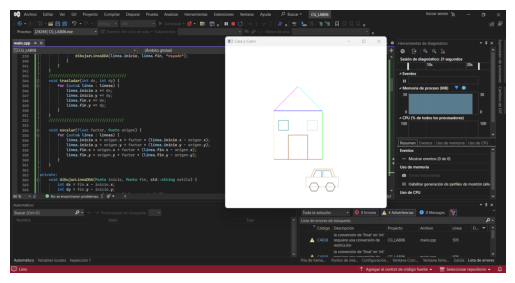

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

# Suponiendo que el nombre del archivo cargado es 'imagen.jpg'
img = Image.open('3.png')
plt.imshow(img)
plt.axis('off')  # Para ocultar los ejes
plt.show()
